#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# <center><font color=7E4456>Widhya</font></center>

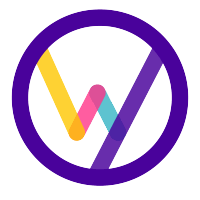

#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### <center><font color=7E4456>Data Science Internship

### <center><font color=7E4456>By </font><font color=15D77D>: </font><font color=5B1736>Shreeya Ravindra Pant-Paradkar</font></center>
#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# <center><font color=5B4727>Quantitative Modeling</font></center>
### <center><font color=5B4727>(Level - Beginner)</font></center>
# <center><font color=14655D>Mission 1 : Covid-19 Analysis</font></center>
### <center><font color=155E64>Problem Statement: </font><font color=5B4727>Predict future number of cases</font>
#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

###### Date: 06-01-21 (Wednesday)

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading Dataset

In [2]:
df=pd.read_csv('covid.csv')

#### Data Exploration

In [3]:
df.head()

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,1,30-01-2020,Kerala,1,0,0,0
1,2,31-01-2020,Kerala,1,0,0,0
2,3,01-02-2020,Kerala,2,0,0,0
3,4,02-02-2020,Kerala,3,0,0,0
4,5,03-02-2020,Kerala,3,0,0,0


In [4]:
df.shape

(270, 7)

In [5]:
df.describe()

,Sno,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,135.500000,5.551852,1.329630,0.603704,0.092593
std,78.086491,8.339625,3.587288,1.461522,0.290399
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,68.250000,1.000000,0.000000,0.000000,0.000000
50%,135.500000,3.000000,0.000000,0.000000,0.000000
75%,202.750000,6.000000,0.000000,0.000000,0.000000
max,270.000000,60.000000,14.000000,9.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       270 non-null    int64 
 1   Date                      270 non-null    object
 2   State/UnionTerritory      270 non-null    object
 3   ConfirmedIndianNational   270 non-null    int64 
 4   ConfirmedForeignNational  270 non-null    int64 
 5   Cured                     270 non-null    int64 
 6   Deaths                    270 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 14.9+ KB


In [7]:
df.isna().sum() #identifying null values

Sno                         0
Date                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
dtype: int64

#### Grouping Data by Dates

In [8]:
dfnew = df.drop(columns = ['Sno','State/UnionTerritory']).groupby(by = ['Date'],sort = False,as_index = False)
dfnew = dfnew.sum()
dfnew.head()

,Date,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,30-01-2020,1,0,0,0
1,31-01-2020,1,0,0,0
2,01-02-2020,2,0,0,0
3,02-02-2020,3,0,0,0
4,03-02-2020,3,0,0,0


In [9]:
dfnew['Total_cases'] = dfnew.sum(axis = 1) #adding new columns to existing dataset
dfnew.head()

,Date,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Total_cases
0,30-01-2020,1,0,0,0,1
1,31-01-2020,1,0,0,0,1
2,01-02-2020,2,0,0,0,2
3,02-02-2020,3,0,0,0,3
4,03-02-2020,3,0,0,0,3


#### Microtask - 3: What were the total number of cases on 04/03/2020?

In [10]:
dfnew.loc[dfnew['Date']=='04-03-2020']

,Date,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Total_cases
34,04-03-2020,12,16,3,0,31


>Total number of cases as of 01/03/2020 are 31

Text(0, 0.5, 'Total Cases')

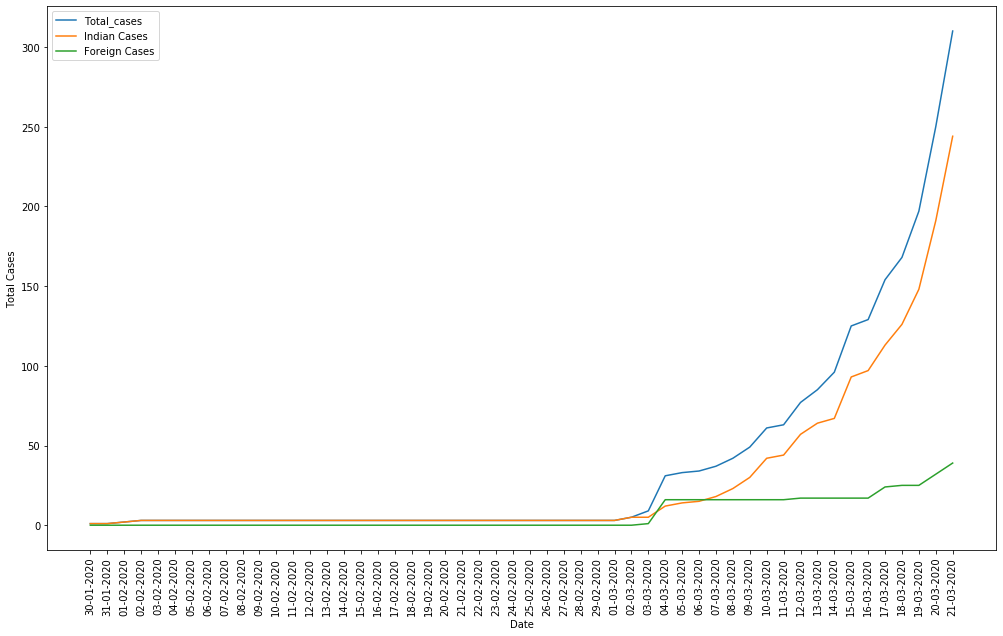

In [11]:
size = (17,10) #comparing total_cases with indian_cases and foreign_cases
fig, ax = plt.subplots(figsize=size)
ax = plt.plot(dfnew['Date'],dfnew['Total_cases'], label="Total_cases")
ax = plt.plot(dfnew['Date'],dfnew['ConfirmedIndianNational'],label="Indian Cases")
ax = plt.plot(dfnew['Date'],dfnew['ConfirmedForeignNational'],label="Foreign Cases")
ax = plt.legend(loc='upper left')
plt.xticks(rotation=90)
plt.xlabel('Date',fontsize=10)
plt.ylabel('Total Cases',fontsize=10)

#### Rate of increase in cases each day

In [12]:
r = 0.0   
start_date = dfnew.index[dfnew['Date'] == '04-03-2020'][0]
end_date = dfnew.index[dfnew['Date'] == '21-03-2020'][0]
for i in range(start_date,end_date):
    curr_day_cases = dfnew.iloc[i]['Total_cases']
    next_day_cases = dfnew.iloc[i + 1]['Total_cases']
    daily_rate = (next_day_cases - curr_day_cases) / curr_day_cases
    r += daily_rate
r /= (end_date - start_date)
r

0.14814803793984233

#### Predicted Forecast (P_t)

In [13]:
from math import exp
P_o = 31
t =26
P_t = P_o * exp(r * t)
P_t

1459.4810275382426

In [14]:
round(P_t,2)

1459.48

#### Conclusion
##### I have successfully predicted the future number of covid-19 cases using the exponential function.

#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# <center><font color=5B1736>Thank You!</font></center>